This Jupyter Notebook Consists of exploratory analysis of source_1 data. This step mainly consists of analyzing the relation between temperature, humidity and pressure. This was checked using various graphs and solidified by Pearson Correlation. It is a statistical measurement which checks the linear relationship between two variables. The values range between -1 to 1. Negative value indicates inverse relationship between the two variables (If one value increases, the other value decreases). Positive value indicates direct relationship betwen the two variables (If one value increases, the other value also increases). If the value is 0 then there is no relation between the two variables. For this dataset, temperature has inverse relationship between humidity and pressure.
This notebook also checks for missing values and various statistical measures such as mean, standard deviation etc.

In [1]:
#Importing the libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Fetching the dataset and storing it in the form of dataframe.

df = pd.read_csv("../plot2-Source 1 Weather.csv")
df

,sensor,value,datetime
0,TC,16.5,2019-01-01 00:00:00+00:00
1,HUM,44.0,2019-01-01 00:00:00+00:00
2,PRES,1020.0,2019-01-01 00:00:00+00:00
3,TC,17.3,2019-01-01 01:00:00+00:00
4,HUM,43.0,2019-01-01 01:00:00+00:00
...,...,...,...
26206,HUM,47.0,2019-12-31 22:30:00+00:00
26207,PRES,1016.0,2019-12-31 22:30:00+00:00
26208,TC,17.0,2019-12-31 23:30:00+00:00
26209,HUM,46.0,2019-12-31 23:30:00+00:00


In [3]:
#Checking for unique categories in the sensor column.

df['sensor'].unique()

array(['TC', 'HUM', 'PRES'], dtype=object)

In [4]:
#Splitting the datetime column into date and time column.

df['Dates'] = pd.to_datetime(df['datetime']).dt.date
df['Time'] = pd.to_datetime(df['datetime']).dt.time
df

,sensor,value,datetime,Dates,Time
0,TC,16.5,2019-01-01 00:00:00+00:00,2019-01-01,00:00:00
1,HUM,44.0,2019-01-01 00:00:00+00:00,2019-01-01,00:00:00
2,PRES,1020.0,2019-01-01 00:00:00+00:00,2019-01-01,00:00:00
3,TC,17.3,2019-01-01 01:00:00+00:00,2019-01-01,01:00:00
4,HUM,43.0,2019-01-01 01:00:00+00:00,2019-01-01,01:00:00
...,...,...,...,...,...
26206,HUM,47.0,2019-12-31 22:30:00+00:00,2019-12-31,22:30:00
26207,PRES,1016.0,2019-12-31 22:30:00+00:00,2019-12-31,22:30:00
26208,TC,17.0,2019-12-31 23:30:00+00:00,2019-12-31,23:30:00
26209,HUM,46.0,2019-12-31 23:30:00+00:00,2019-12-31,23:30:00


In [5]:
#Dropping the datetime column.

df2 = df.drop(['datetime'],axis=1)
df2

,sensor,value,Dates,Time
0,TC,16.5,2019-01-01,00:00:00
1,HUM,44.0,2019-01-01,00:00:00
2,PRES,1020.0,2019-01-01,00:00:00
3,TC,17.3,2019-01-01,01:00:00
4,HUM,43.0,2019-01-01,01:00:00
...,...,...,...,...
26206,HUM,47.0,2019-12-31,22:30:00
26207,PRES,1016.0,2019-12-31,22:30:00
26208,TC,17.0,2019-12-31,23:30:00
26209,HUM,46.0,2019-12-31,23:30:00


In [6]:
#Fetching the first 12 values of the time column.

df2['Time'].head(12)

0     00:00:00
1     00:00:00
2     00:00:00
3     01:00:00
4     01:00:00
5     01:00:00
6     02:00:00
7     02:00:00
8     02:00:00
9     03:00:00
10    03:00:00
11    03:00:00
Name: Time, dtype: object

In [7]:
#Fetching the last 12 values of the time column.

df2['Time'].tail(12)

26199    20:30:00
26200    20:30:00
26201    20:30:00
26202    21:30:00
26203    21:30:00
26204    21:30:00
26205    22:30:00
26206    22:30:00
26207    22:30:00
26208    23:30:00
26209    23:30:00
26210    23:30:00
Name: Time, dtype: object

In [8]:
#Fetching the first 12 values of dates column.

df2['Dates'].head(12)

0     2019-01-01
1     2019-01-01
2     2019-01-01
3     2019-01-01
4     2019-01-01
5     2019-01-01
6     2019-01-01
7     2019-01-01
8     2019-01-01
9     2019-01-01
10    2019-01-01
11    2019-01-01
Name: Dates, dtype: object

In [9]:
#Fetching the last 12 values of the dates column.

df2['Dates'].tail(12)

26199    2019-12-31
26200    2019-12-31
26201    2019-12-31
26202    2019-12-31
26203    2019-12-31
26204    2019-12-31
26205    2019-12-31
26206    2019-12-31
26207    2019-12-31
26208    2019-12-31
26209    2019-12-31
26210    2019-12-31
Name: Dates, dtype: object

In [10]:
Temperature = ['TC']

In [11]:
#Filtering all the records which contains temperature sensor and storing them seperately.

Temp_Sensor = df2[df2['sensor'].isin(Temperature)]
Temp_Sensor = Temp_Sensor.drop(['Dates','Time','sensor'],axis=1)
Temp_Sensor

,value
0,16.5
3,17.3
6,18.0
9,18.8
12,20.5
...,...
26196,16.0
26199,18.0
26202,18.0
26205,18.0


In [12]:
#Reordering the index.

Temp_Sensor.index = range(8737)
Temp_Sensor

,value
0,16.5
1,17.3
2,18.0
3,18.8
4,20.5
...,...
8732,16.0
8733,18.0
8734,18.0
8735,18.0


In [13]:
Humidity = ['HUM']

In [14]:
#Filtering all the records which contains humidity sensor and storing them seperately.

Hum_Sensor = df2[df2['sensor'].isin(Humidity)]
Hum_Sensor = Hum_Sensor.drop(['sensor','Dates','Time'],axis=1)
Hum_Sensor.index = range(8737)
Hum_Sensor

,value
0,44.0
1,43.0
2,42.0
3,42.0
4,37.0
...,...
8732,49.0
8733,49.0
8734,48.0
8735,47.0


In [15]:
Pressure = ['PRES']

In [16]:
#Filtering all the records which contains pressure sensor and storing them seperately.

Pres_Sensor = df2[df2['sensor'].isin(Pressure)]
Pres_Sensor = Pres_Sensor.drop(['sensor','Dates','Time'],axis=1)
Pres_Sensor.index = range(8737)
Pres_Sensor

,value
0,1020.0
1,1021.0
2,1021.0
3,1022.0
4,1021.0
...,...
8732,1016.0
8733,1016.0
8734,1016.0
8735,1016.0


In [17]:
#Concatenating all the filtered values in a columnar fashion and creating a seperate dataframe.

Df3 = pd.concat([Temp_Sensor, Hum_Sensor, Pres_Sensor], axis=1, ignore_index=True)
Df3

,0,1,2
0,16.5,44.0,1020.0
1,17.3,43.0,1021.0
2,18.0,42.0,1021.0
3,18.8,42.0,1022.0
4,20.5,37.0,1021.0
...,...,...,...
8732,16.0,49.0,1016.0
8733,18.0,49.0,1016.0
8734,18.0,48.0,1016.0
8735,18.0,47.0,1016.0


In [18]:
#Renaming the column names.

Df3.columns = ['Temperature', 'Humidity', 'Pressure']
Df3

,Temperature,Humidity,Pressure
0,16.5,44.0,1020.0
1,17.3,43.0,1021.0
2,18.0,42.0,1021.0
3,18.8,42.0,1022.0
4,20.5,37.0,1021.0
...,...,...,...
8732,16.0,49.0,1016.0
8733,18.0,49.0,1016.0
8734,18.0,48.0,1016.0
8735,18.0,47.0,1016.0


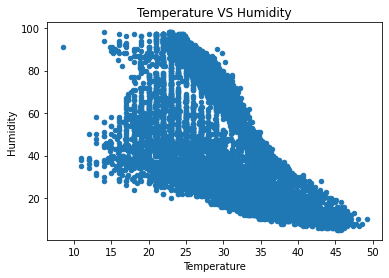

In [19]:
#Scatterplot to show the relationship between temperature and humidity.

Df3.plot.scatter(x='Temperature', y='Humidity', title= "Temperature VS Humidity");
plt.show(block=True);

In [20]:
#Checking the relationship between the variables using Pearson's correlation.

corrrelation = Df3.corr(method="pearson");
print("Pearson correlation coefficient:");
print(corrrelation);

Pearson correlation coefficient:
             Temperature  Humidity  Pressure
Temperature     1.000000 -0.621024 -0.538473
Humidity       -0.621024  1.000000 -0.129859
Pressure       -0.538473 -0.129859  1.000000


In [21]:
#Checking for missing values and extracting various statistical information.

Df3.describe()

,Temperature,Humidity,Pressure
count,8737.000000,8737.000000,8737.000000
mean,29.015257,50.170654,1007.917935
std,6.862445,26.747686,6.556165
min,8.500000,5.000000,989.000000
25%,24.100000,27.000000,1002.000000
50%,27.700000,46.000000,1008.000000
75%,33.400000,75.000000,1014.000000
max,49.200000,98.000000,1022.000000


In [22]:
Temperature_Reading = df2[df2['sensor'].isin(Temperature)]
Temperature_Reading

,sensor,value,Dates,Time
0,TC,16.5,2019-01-01,00:00:00
3,TC,17.3,2019-01-01,01:00:00
6,TC,18.0,2019-01-01,02:00:00
9,TC,18.8,2019-01-01,03:00:00
12,TC,20.5,2019-01-01,04:00:00
...,...,...,...,...
26196,TC,16.0,2019-12-31,19:30:00
26199,TC,18.0,2019-12-31,20:30:00
26202,TC,18.0,2019-12-31,21:30:00
26205,TC,18.0,2019-12-31,22:30:00


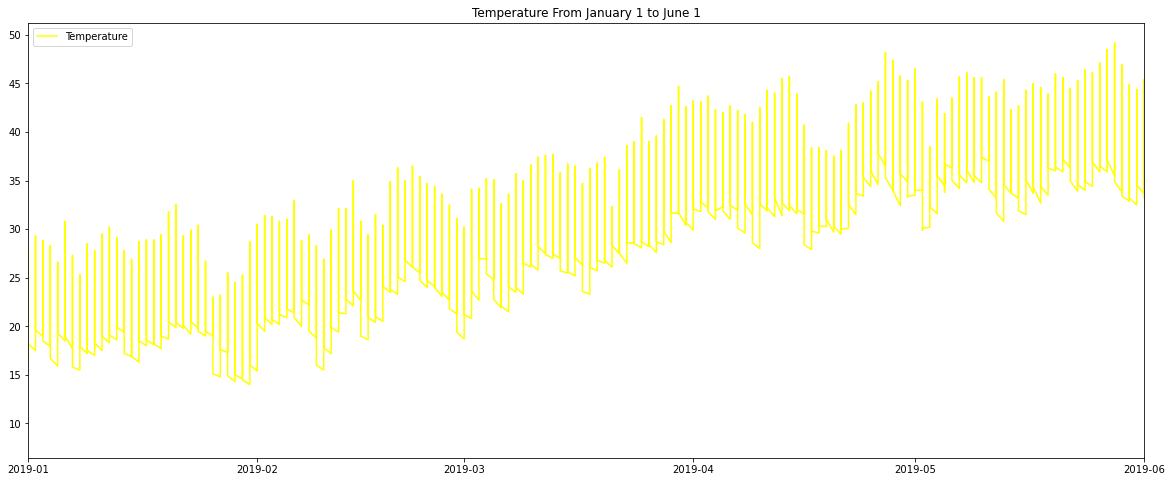

In [23]:
#Plotting the graph for time vs temperature (01-January-2019,01-June-2019).

import matplotlib.dates as mdates
import datetime

fig = plt.figure(figsize=(20,8))
ax = plt.axes()

ax.plot(Temperature_Reading['Dates'], Temperature_Reading['value'], color = 'yellow', label = 'Temperature')

ax.set_xlim([datetime.date(2019,1,1), datetime.date(2019,6,1)])
ax.set_title('Temperature From January 1 to June 1')
ax.legend(loc="upper left")

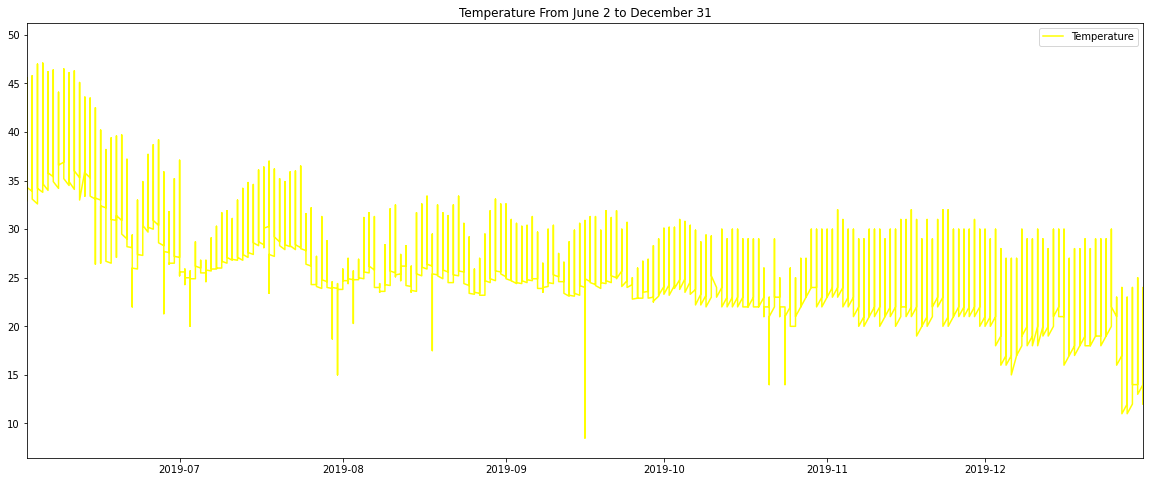

In [24]:
#Plotting the graph for time vs temperature (02-June-2019,31-December-2019).

fig = plt.figure(figsize=(20,8))
ax = plt.axes()

ax.plot(Temperature_Reading['Dates'], Temperature_Reading['value'], color = 'yellow', label = 'Temperature')

ax.set_xlim([datetime.date(2019,6,2), datetime.date(2019, 12, 31)])
ax.set_title('Temperature From June 2 to December 31')
ax.legend(loc="upper right")

In [25]:
Humidity_Reading = df2[df2['sensor'].isin(Humidity)]
Humidity_Reading

,sensor,value,Dates,Time
1,HUM,44.0,2019-01-01,00:00:00
4,HUM,43.0,2019-01-01,01:00:00
7,HUM,42.0,2019-01-01,02:00:00
10,HUM,42.0,2019-01-01,03:00:00
13,HUM,37.0,2019-01-01,04:00:00
...,...,...,...,...
26197,HUM,49.0,2019-12-31,19:30:00
26200,HUM,49.0,2019-12-31,20:30:00
26203,HUM,48.0,2019-12-31,21:30:00
26206,HUM,47.0,2019-12-31,22:30:00


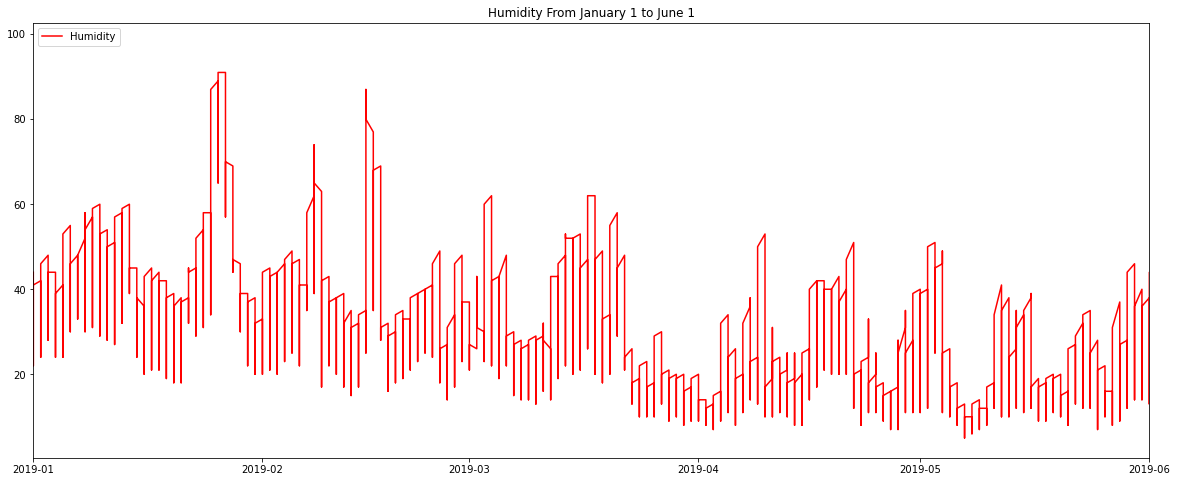

In [26]:
#Plotting the graph for time vs humidity (01-January-2019,01-June-2019).

fig = plt.figure(figsize=(20,8))
ax = plt.axes()

ax.plot(Humidity_Reading['Dates'], Humidity_Reading['value'], color = 'red', label = 'Humidity')

ax.set_xlim([datetime.date(2019,1,1), datetime.date(2019,6,1)])
ax.set_title('Humidity From January 1 to June 1')
ax.legend(loc="upper left")

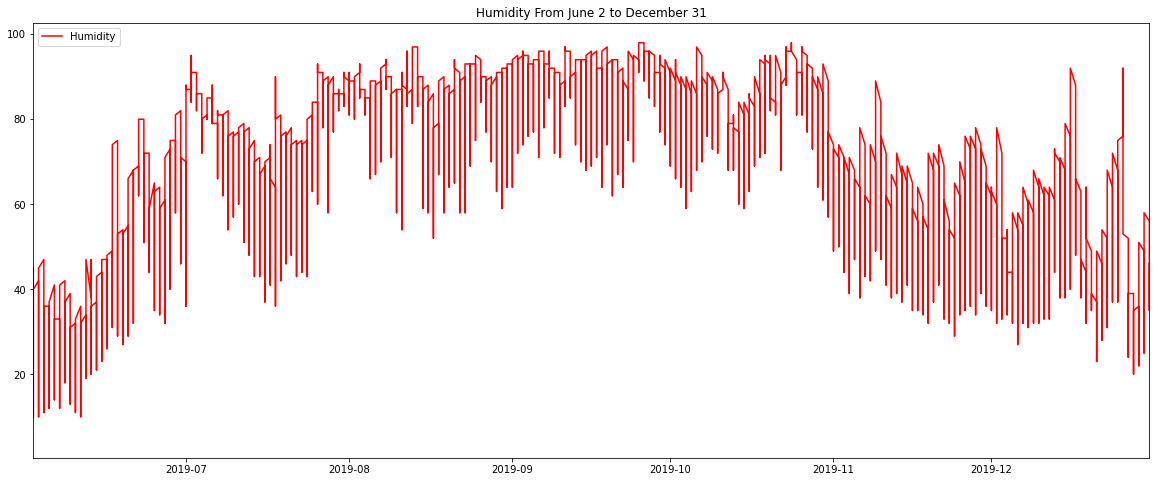

In [27]:
#Plotting the graph for time vs humidity (02-June-2019,31-December-2019).

fig = plt.figure(figsize=(20,8))
ax = plt.axes()

ax.plot(Humidity_Reading['Dates'], Humidity_Reading['value'], color = 'red', label = 'Humidity')

ax.set_xlim([datetime.date(2019,6,2), datetime.date(2019,12,31)])
ax.set_title('Humidity From June 2 to December 31')
ax.legend(loc="upper left")

In [28]:
Pressure_Reading = df2[df2['sensor'].isin(Pressure)]
Pressure_Reading

,sensor,value,Dates,Time
2,PRES,1020.0,2019-01-01,00:00:00
5,PRES,1021.0,2019-01-01,01:00:00
8,PRES,1021.0,2019-01-01,02:00:00
11,PRES,1022.0,2019-01-01,03:00:00
14,PRES,1021.0,2019-01-01,04:00:00
...,...,...,...,...
26198,PRES,1016.0,2019-12-31,19:30:00
26201,PRES,1016.0,2019-12-31,20:30:00
26204,PRES,1016.0,2019-12-31,21:30:00
26207,PRES,1016.0,2019-12-31,22:30:00


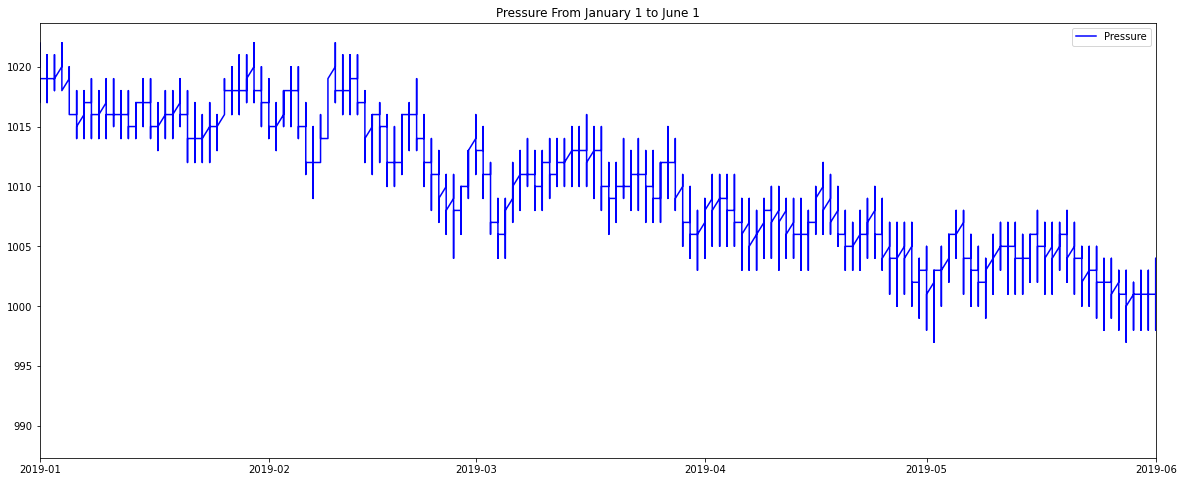

In [29]:
#Plotting the graph for time vs pressure (01-January-2019,01-June-2019).

fig = plt.figure(figsize=(20,8))
ax = plt.axes()

ax.plot(Pressure_Reading['Dates'], Pressure_Reading['value'], color = 'blue', label = 'Pressure')

ax.set_xlim([datetime.date(2019,1,1), datetime.date(2019,6,1)])
ax.set_title('Pressure From January 1 to June 1')
ax.legend(loc="upper right")

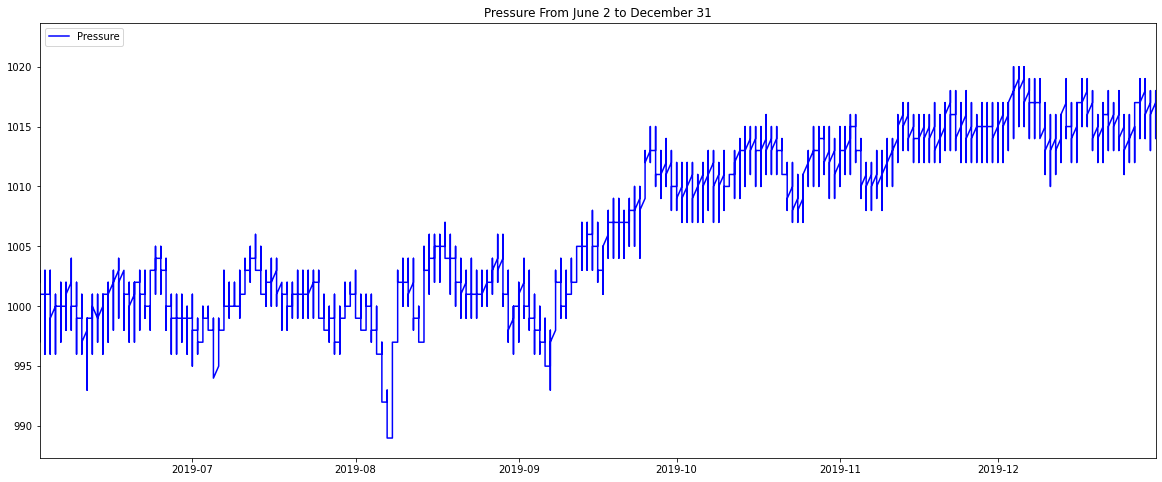

In [30]:
#Plotting the graph for time vs pressure (02-June-2019,31-December-2019).

fig = plt.figure(figsize=(20,8))
ax = plt.axes()

ax.plot(Pressure_Reading['Dates'], Pressure_Reading['value'], color = 'blue', label = 'Pressure')

ax.set_xlim([datetime.date(2019,6,2), datetime.date(2019,12,31)])
ax.set_title('Pressure From June 2 to December 31')
ax.legend(loc="upper left")